In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas DataFrames
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)      # Adjust display width

# Define the URL for the PIMA Diabetes Dataset
# This dataset is commonly used and available from UCI ML Repository
data_url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(data_url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure you have an active internet connection or try downloading the CSV manually.")
    print("Manual download link: https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data")
    print("If downloaded manually, save it as 'diabetes.csv' in the same directory as this notebook.")

# Display the first 5 rows of the DataFrame to get an initial look
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics of the DataFrame
print("\nDescriptive Statistics:")
print(df.describe())

Dataset loaded successfully!

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 

In [2]:
# --- Step 2: Handle Missing Values & Outliers ---

print("\nChecking for zero values in relevant columns (which might indicate missing data):")
# Columns where zero values are physiologically impossible or highly unlikely.
# These are the input features used to predict the 'Outcome' (Diabetes).
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_check:
    # Count the number of zero values in each specified column
    zero_count = (df[col] == 0).sum()
    print(f"Column '{col}': {zero_count} zeros")

# Replace zero values with NaN for easier handling.
# This makes it clear that these are missing data points, not actual zero measurements.
print("\nReplacing zero values with NaN for imputation:")
df[cols_to_check] = df[cols_to_check].replace(0, np.nan)

# Verify that zeros have been replaced by NaNs.
# This shows how many actual missing values (NaNs) are now present in each column.
print("\nChecking for NaN values after replacement:")
print(df.isnull().sum())

# For now, let's impute missing values with the median of their respective columns.
# Median is often preferred over mean for skewed data or when outliers are present,
# as it is less sensitive to extreme values. This ensures our model has complete data.
print("\nImputing missing values with the median of each column:")
for col in cols_to_check:
    median_val = df[col].median()
    # MODIFICATION START: Addressing the FutureWarning for inplace=True
    # Instead of df[col].fillna(median_val, inplace=True), we assign the result back
    df[col] = df[col].fillna(median_val)
    # MODIFICATION END
    print(f"Filled missing values in '{col}' with median: {median_val}")

# Verify that there are no more NaN values after imputation.
print("\nChecking for NaN values after imputation:")
print(df.isnull().sum())

# Display descriptive statistics after handling missing values to see the impact.
# This helps us understand the new distribution of our features.
print("\nDescriptive Statistics after handling missing values:")
print(df.describe())



Checking for zero values in relevant columns (which might indicate missing data):
Column 'Glucose': 5 zeros
Column 'BloodPressure': 35 zeros
Column 'SkinThickness': 227 zeros
Column 'Insulin': 374 zeros
Column 'BMI': 11 zeros

Replacing zero values with NaN for imputation:

Checking for NaN values after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Imputing missing values with the median of each column:
Filled missing values in 'Glucose' with median: 117.0
Filled missing values in 'BloodPressure' with median: 72.0
Filled missing values in 'SkinThickness' with median: 29.0
Filled missing values in 'Insulin' with median: 125.0
Filled missing values in 'BMI' with median: 32.3

Checking for NaN values after imputation:
Pregn

--- Starting Exploratory Data Analysis (EDA) ---

1. Distribution of the Target Variable ('Outcome'):
Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


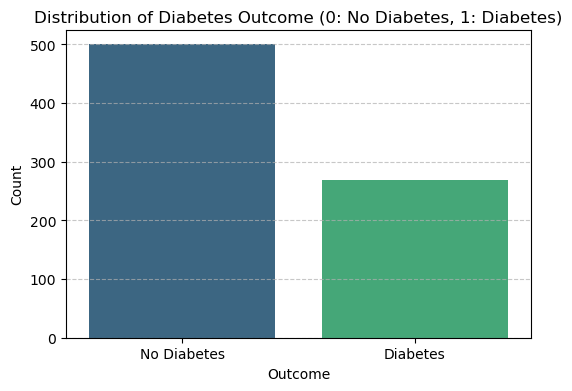


2. Visualizing Distributions of Individual Features:


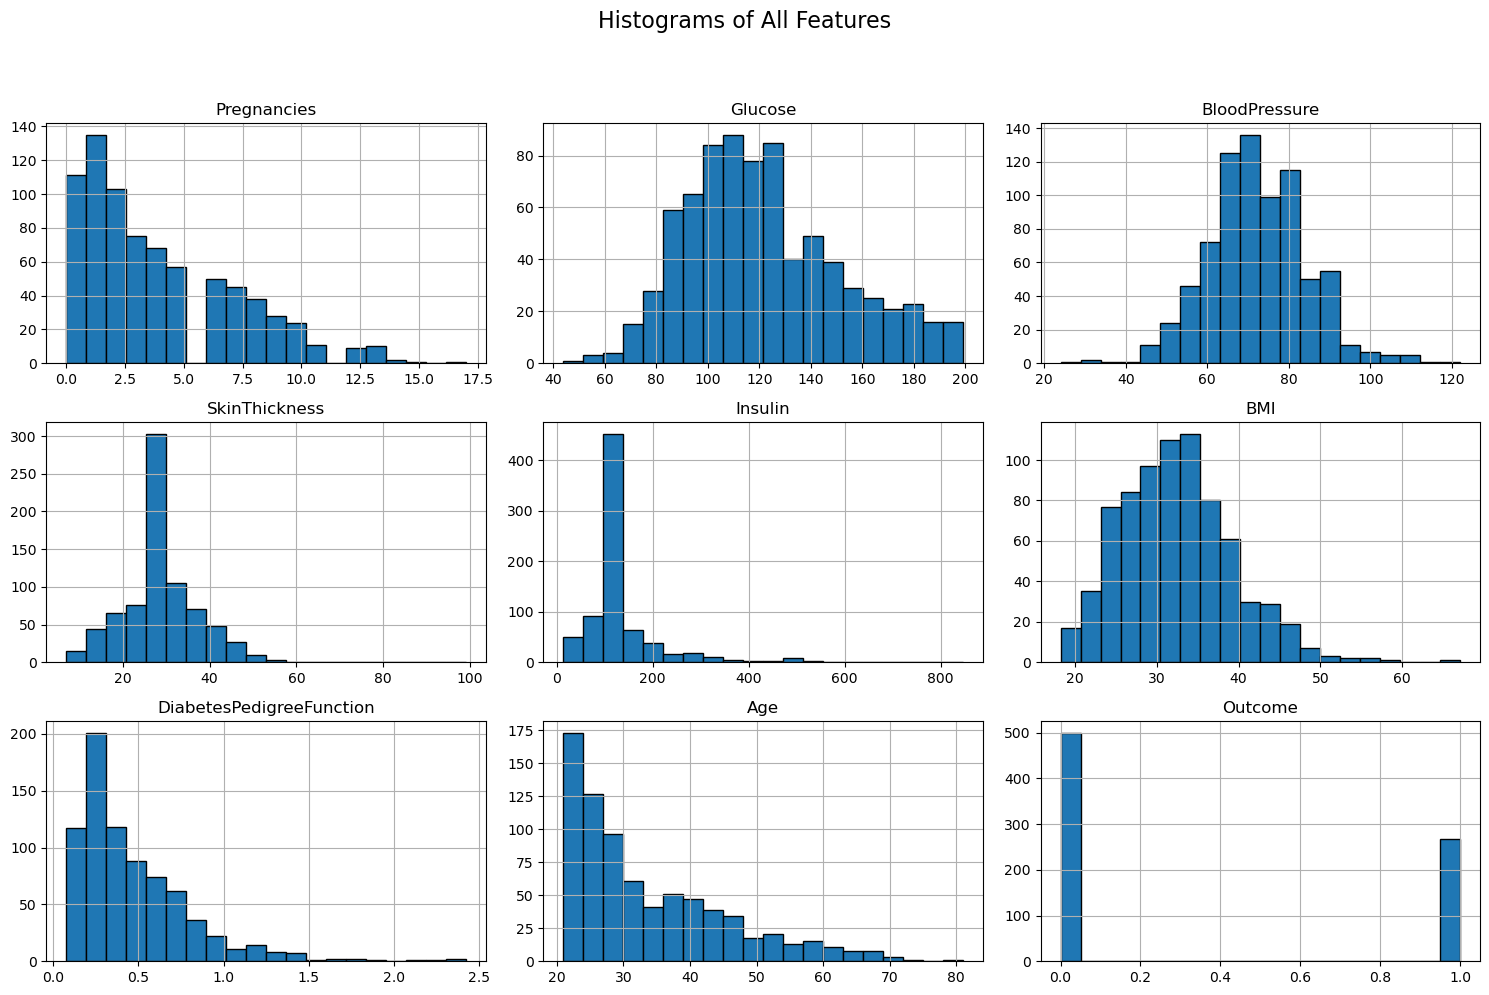

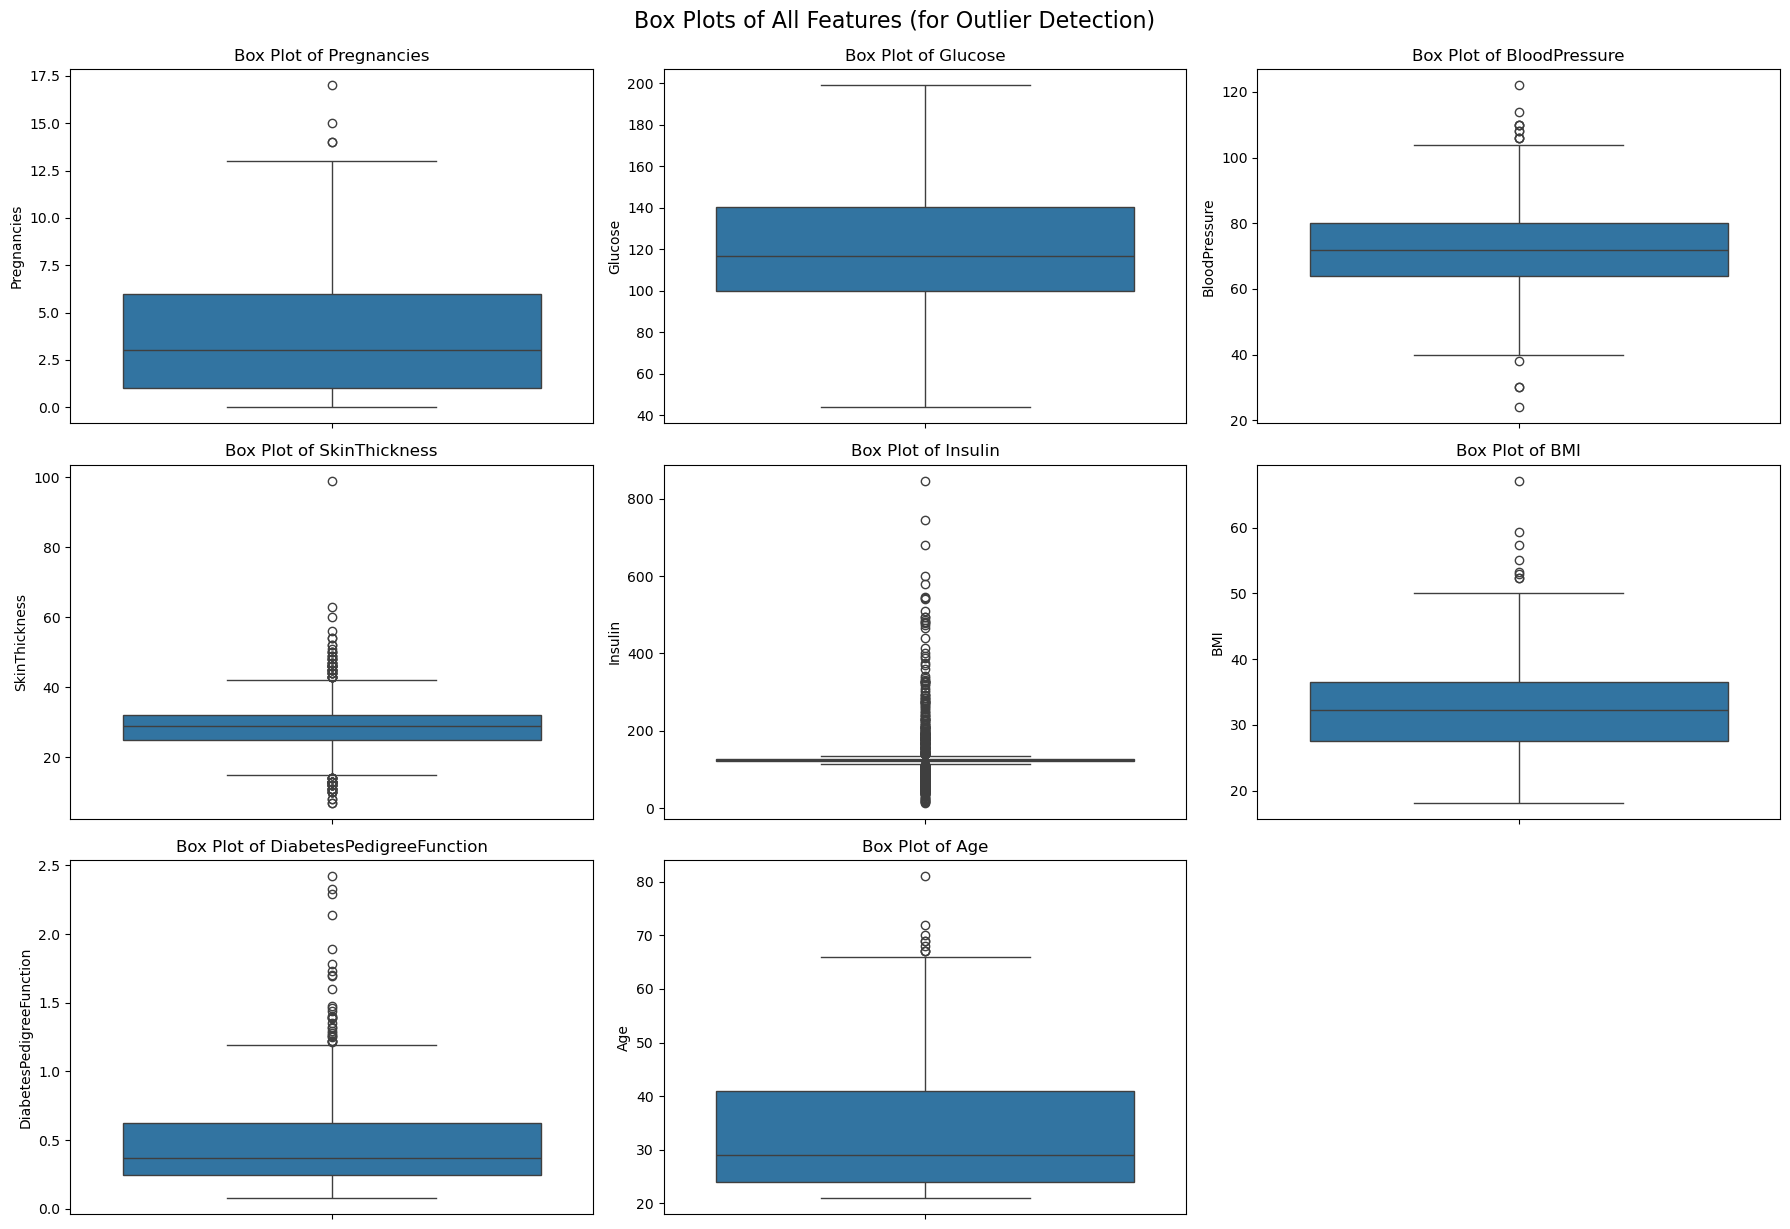


3. Generating Correlation Matrix:


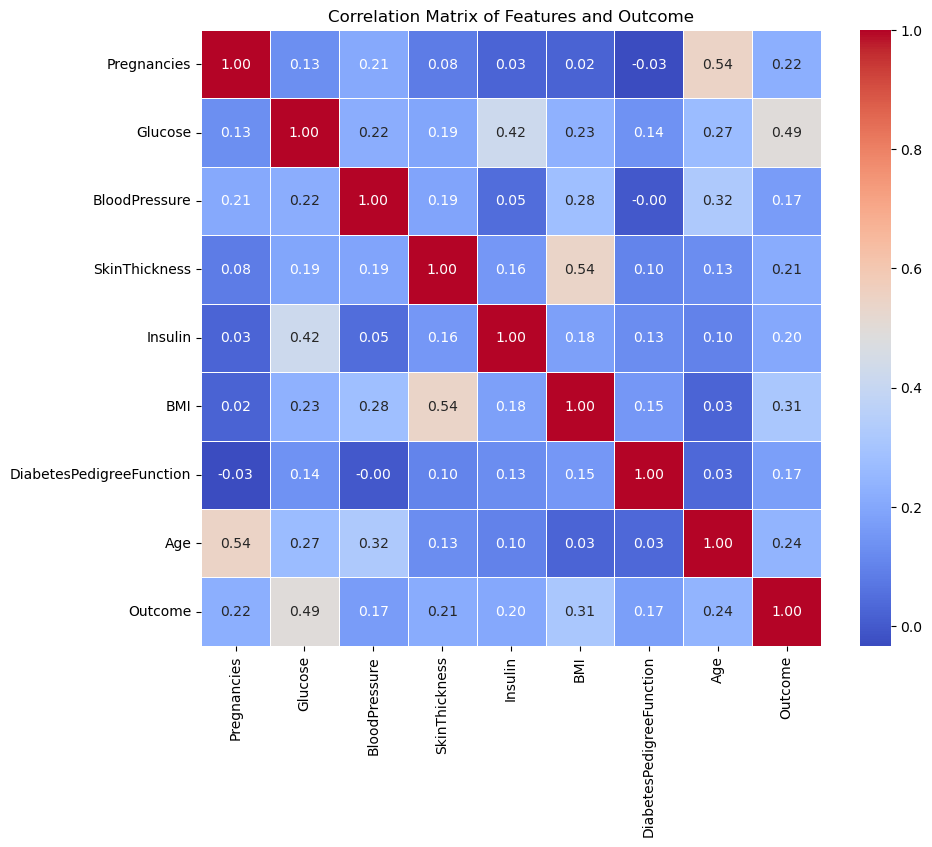


--- EDA Complete ---


In [3]:
# --- Step 3: Exploratory Data Analysis (EDA) ---

print("--- Starting Exploratory Data Analysis (EDA) ---")

# 1. Distribution of the Target Variable ('Outcome')
print("\n1. Distribution of the Target Variable ('Outcome'):")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
# Updated sns.countplot to address FutureWarning
sns.countplot(x='Outcome', data=df, palette='viridis', hue='Outcome', legend=False)
plt.title('Distribution of Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Distributions of Individual Features (Histograms and Box Plots)
print("\n2. Visualizing Distributions of Individual Features:")

# List of all feature columns (excluding 'Outcome')
feature_columns = df.columns.drop('Outcome')

# Create histograms for all features
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

# Create box plots for all features to identify outliers
plt.figure(figsize=(18, 12))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of features (e.g., 3 rows, 3 columns)
    # Removed 'palette' argument from sns.boxplot to address FutureWarning
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of All Features (for Outlier Detection)', y=1.02, fontsize=16)
plt.show()


# 3. Correlation Matrix
print("\n3. Generating Correlation Matrix:")
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Outcome')
plt.show()

print("\n--- EDA Complete ---")


In [4]:
# --- Phase 3: Machine Learning Model Development & Training ---

print("--- Starting Data Splitting ---")

# 1. Separate Features (X) and Target (y)
# X will contain all columns except 'Outcome'
X = df.drop('Outcome', axis=1)
# y will contain only the 'Outcome' column
y = df['Outcome']

print(f"\nShape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

# Display first few rows of X and y to confirm
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nFirst 5 rows of Target (y):")
print(y.head())

# 2. Split Data into Training and Testing Sets
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
# random_state ensures reproducibility of the split
# stratify=y ensures that the proportion of target variable (diabetes/no diabetes)
# is the same in both training and testing sets, which is important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\n--- Data Splitting Complete ---")


--- Starting Data Splitting ---

Shape of Features (X): (768, 8)
Shape of Target (y): (768,)

First 5 rows of Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0           35.0    125.0  33.6                     0.627   50
1            1     85.0           66.0           29.0    125.0  26.6                     0.351   31
2            8    183.0           64.0           29.0    125.0  23.3                     0.672   32
3            1     89.0           66.0           23.0     94.0  28.1                     0.167   21
4            0    137.0           40.0           35.0    168.0  43.1                     2.288   33

First 5 rows of Target (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)

--- Data Splitting Complete ---


In [5]:
# --- Phase 3: Machine Learning Model Development & Training (Continued) ---

print("--- Starting Model Selection and Training ---")

# Import necessary classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the models
# For Logistic Regression, max_iter is set to ensure convergence
# random_state is set for reproducibility for tree-based models
log_reg_model = LogisticRegression(max_iter=200, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

print("\nModels Initialized:")
print(f"- Logistic Regression: {log_reg_model}")
print(f"- Random Forest Classifier: {rf_model}")
print(f"- Decision Tree Classifier: {dt_model}")

# Train each model on the training data
print("\nTraining Models...")

# Train Logistic Regression
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Model Trained.")

# Train Random Forest Classifier
rf_model.fit(X_train, y_train)
print("Random Forest Classifier Model Trained.")

# Train Decision Tree Classifier
dt_model.fit(X_train, y_train)
print("Decision Tree Classifier Model Trained.")

print("\n--- Model Training Complete ---")

# We will evaluate these models in the next step.


--- Starting Model Selection and Training ---

Models Initialized:
- Logistic Regression: LogisticRegression(max_iter=200, random_state=42)
- Random Forest Classifier: RandomForestClassifier(random_state=42)
- Decision Tree Classifier: DecisionTreeClassifier(random_state=42)

Training Models...
Logistic Regression Model Trained.
Random Forest Classifier Model Trained.
Decision Tree Classifier Model Trained.

--- Model Training Complete ---


--- Starting Model Evaluation ---

Evaluating Logistic Regression...
  Accuracy: 0.7013
  Precision: 0.5870
  Recall: 0.5000
  F1-Score: 0.5400


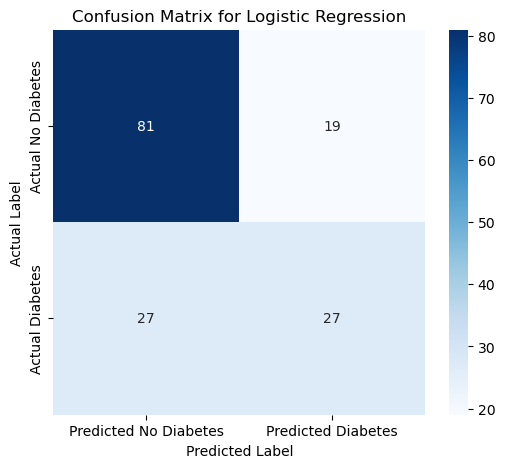

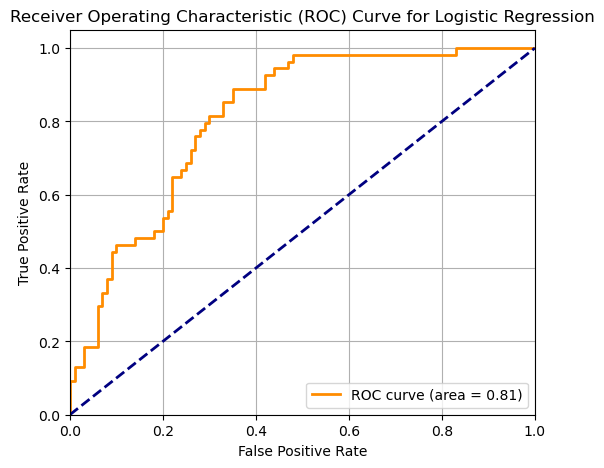


Evaluating Random Forest...
  Accuracy: 0.7792
  Precision: 0.7273
  Recall: 0.5926
  F1-Score: 0.6531


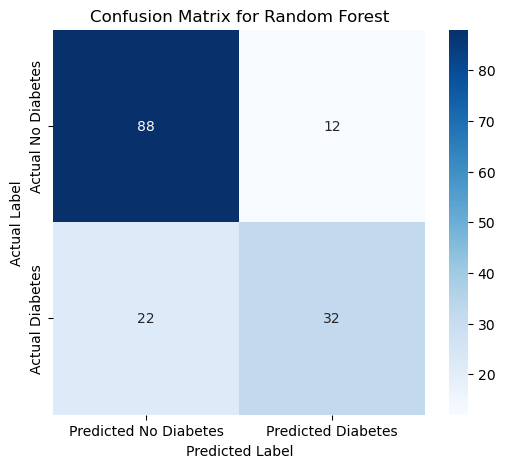

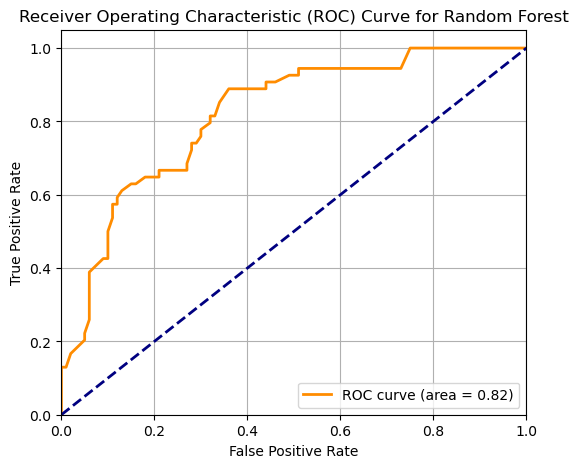


  Feature Importances for Random Forest:
Glucose                     0.274086
BMI                         0.161903
DiabetesPedigreeFunction    0.125020
Age                         0.112985
Insulin                     0.091224
BloodPressure               0.083518
Pregnancies                 0.080795
SkinThickness               0.070468
dtype: float64


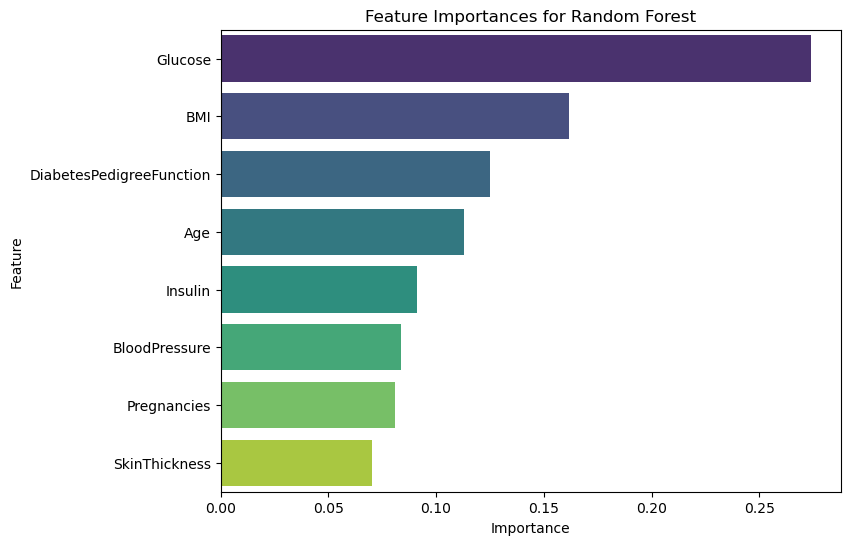


Evaluating Decision Tree...
  Accuracy: 0.6818
  Precision: 0.5532
  Recall: 0.4815
  F1-Score: 0.5149


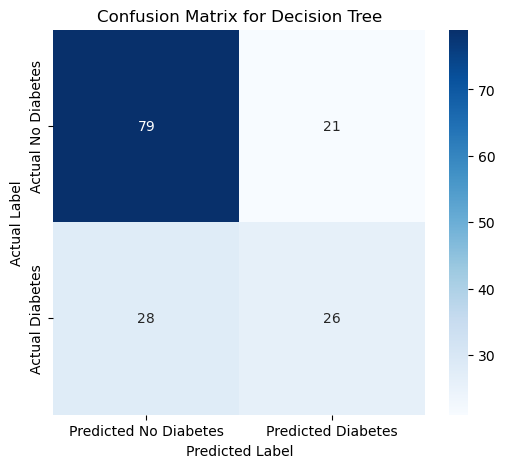

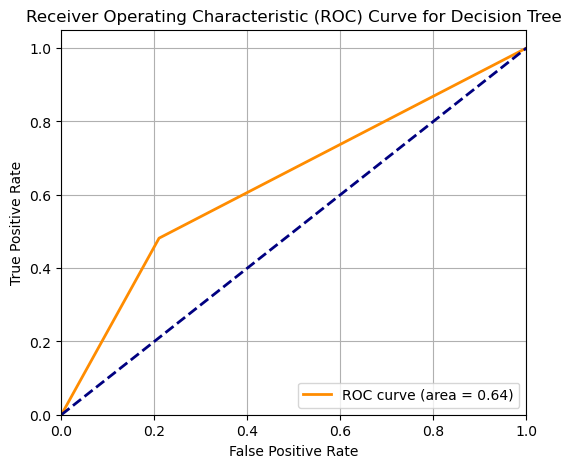


  Feature Importances for Decision Tree:
Glucose                     0.355518
BMI                         0.178572
Age                         0.127095
BloodPressure               0.097661
DiabetesPedigreeFunction    0.092002
Insulin                     0.069723
Pregnancies                 0.064105
SkinThickness               0.015325
dtype: float64


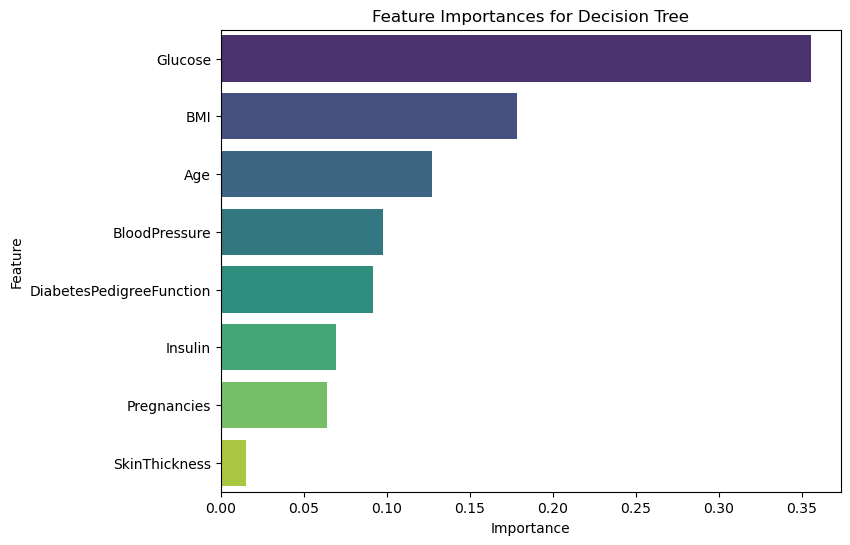


--- Model Evaluation Complete ---

--- Summary of Model Performance ---

Logistic Regression:
  Accuracy: 0.7013
  Precision: 0.5870
  Recall: 0.5000
  F1-Score: 0.5400

Random Forest:
  Accuracy: 0.7792
  Precision: 0.7273
  Recall: 0.5926
  F1-Score: 0.6531

Decision Tree:
  Accuracy: 0.6818
  Precision: 0.5532
  Recall: 0.4815
  F1-Score: 0.5149


In [6]:
# --- Phase 4: Model Evaluation ---

print("--- Starting Model Evaluation ---")

# Import necessary metrics and plotting tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store models for easy iteration
models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model
}

# Loop through each model to make predictions and evaluate
evaluation_results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Get probability estimates for ROC curve
    y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Generate and display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
                yticklabels=['Actual No Diabetes', 'Actual Diabetes'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Generate and display ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Display Feature Importance (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        print(f"\n  Feature Importances for {name}:")
        feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        print(feature_importances)
        plt.figure(figsize=(8, 6))
        # MODIFICATION START: Addressing the FutureWarning for sns.barplot
        # Assign the y variable to 'hue' and set 'legend=False'
        sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
        # MODIFICATION END
        plt.title(f'Feature Importances for {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

print("\n--- Model Evaluation Complete ---")

# Print a summary of all model results
print("\n--- Summary of Model Performance ---")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


In [7]:
import joblib
joblib.dump(log_reg_model, 'log_reg_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
print("Models saved successfully as .pkl files.")

Models saved successfully as .pkl files.
